# Creating a model

In [97]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Flatten

input_shape = (-1, 70, 70, 1)
model = Sequential([
    Conv2D(32, (1,1), padding = "valid", activation='relu', input_shape = input_shape[1:]),
    MaxPool2D((2,2), (2,2)),    
    Flatten(),
    Dense(units=32, activation = 'relu'),
    Dense(units=1, activation = 'softmax')
])

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 70, 70, 32)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 39200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1254432   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,254,529
Trainable params: 1,254,529
Non-trainable params: 0
_________________________________________________________________


# Creating custom dataset

# Training Dataset

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import os
import cv2

DATADIR = "C:/Users/Yogesh/CupDetector"
CATEGORIES = ["Others", "Cup"]
IMG_SIZE = 70
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num =  CATEGORIES.index(category)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        
create_training_data()

In [117]:
print(len(training_data))

26


In [42]:
print(training_data[10])

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [197, 213, 220, ..., 255, 255, 255],
       [189, 196, 194, ..., 255, 255, 255],
       [255, 254, 255, ..., 255, 255, 255]], dtype=uint8), 1]


In [118]:
import random

random.shuffle(training_data)

In [119]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
0
0
1
1


In [120]:
train_img = []
train_labels = []

for feature, label in training_data:
    train_img.append(feature)
    train_labels.append(label)

print(train_img[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

train_img = np.array(train_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array(train_labels)

[[[[199]
   [203]
   [201]
   ...
   [198]
   [193]
   [199]]

  [[199]
   [201]
   [202]
   ...
   [191]
   [201]
   [197]]

  [[201]
   [203]
   [202]
   ...
   [200]
   [200]
   [200]]

  ...

  [[174]
   [178]
   [201]
   ...
   [198]
   [172]
   [200]]

  [[186]
   [189]
   [195]
   ...
   [183]
   [185]
   [196]]

  [[186]
   [192]
   [189]
   ...
   [190]
   [187]
   [188]]]]


In [121]:
import pickle

pickle_out = open("train_img.pickle", "wb")
pickle.dump(train_img, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle", "wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

In [122]:
#while loading the dataset:
pickle_in = open("train_img.pickle", "rb")
train_img = pickle.load(pickle_in)

pickle_in = open("train_labels.pickle", "rb")
train_labels = pickle.load(pickle_in)

# Test Dataset

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import os
import cv2

DATADIR = "C:/Users/Yogesh/CupDetector"
CATEGORIES = ["Others", "Cup"]
IMG_SIZE = 70
test_data = []

def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num =  CATEGORIES.index(category)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_array, class_num])
        
create_test_data()

In [128]:
print(len(test_data))

26


In [129]:
print(test_data[60])

IndexError: list index out of range

In [130]:
import random

random.shuffle(training_data)

In [131]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
0
1
0
1
1


In [132]:
test_img = []
test_labels = []

for feature, label in test_data:
    test_img.append(feature)
    test_labels.append(label)

print(test_img[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

test_img = np.array(test_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array(test_labels)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [133]:
import pickle

pickle_out = open("test_img.pickle", "wb")
pickle.dump(test_img, pickle_out)
pickle_out.close()

pickle_out = open("test_labels.pickle", "wb")
pickle.dump(test_labels, pickle_out)
pickle_out.close()

In [134]:
#while loading the dataset:
pickle_in = open("test_img.pickle", "rb")
test_img = pickle.load(pickle_in)

pickle_in = open("test_labels.pickle", "rb")
test_labels = pickle.load(pickle_in)

# Training the model

In [135]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [163]:
train_img = train_img/255.0
model.fit(train_img, train_labels, steps_per_epoch = 1, epochs = 10, validation_split = 0.8)

Train on 5 samples, validate on 21 samples
Epoch 1/10
5/5 [==============================] - 0s 15ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 5.0831 - val_accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 0s 14ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 5.0831 - val_accuracy: 0.6667
Epoch 3/10
5/5 [==============================] - 0s 15ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 5.0831 - val_accuracy: 0.6667
Epoch 4/10
5/5 [==============================] - 0s 15ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 5.0831 - val_accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 0s 14ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 5.0831 - val_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 0s 12ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 5.0831 - val_accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 0s 14ms/sample - loss: 6.0997 - accuracy: 0.6000 - val_loss: 

In [137]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print("Test loss: {0} - Test Accuracy: {1}".format(test_loss, test_acc))

26/26 [==============================] - 0s 17ms/sample - loss: 5.2786 - accuracy: 0.6538
Test loss: 5.278582572937012 - Test Accuracy: 0.6538461446762085


# Predicting the data

In [87]:
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 70  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(prepare("C:/Users/Yogesh/CupDetector/Cup/cup3.jpg"))

print(prediction)

[[1.]]


In [146]:
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 70  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(prepare("C:/Users/Yogesh/CupDetector/Others/obj3.jpg"))

if prediction == 0:
    print("Cup not detected")
else:
    print("Cup detected")

Cup detected


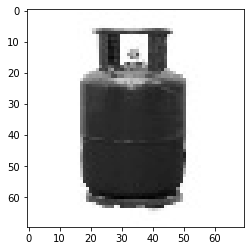

0


In [145]:
import matplotlib.pyplot as plt
abc = 0
plt.imshow(test_img[abc], cmap = 'gray')
plt.show()
print(test_labels[abc])